We discuss different approaches to construct prior distribution. The following approaches are available.

1. Flat priors and transformation
2. Uninformative priors
    - jeffrey priors
    - jeffrey's priors for the normal-normal model
    - KL-maximization priors
3. Weakly informative or regularizing prior
    - normal-normal example
    - weakly regularizing priors on $\mu$, $\sigma$
4. Other choices
    - maximum entropy priors (gaussian?)
    - emprirical bayes priors
5. Priors lose their powers as N increases (more data).

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sn
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (12,6)

# Flat priors and transformation

What we want here are **uninformative priors**

We define a prior $p(theta) = 1$ on the range $[0,1]$

(0, 2)

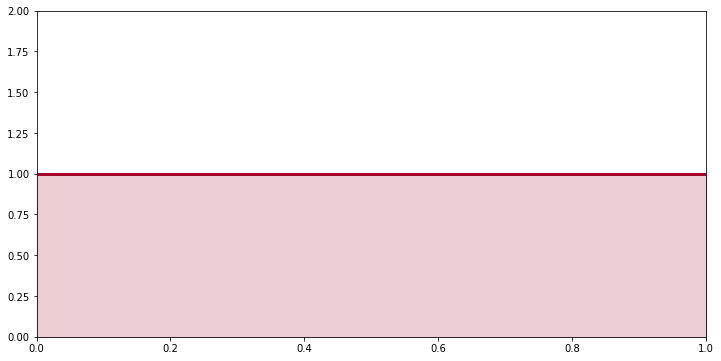

In [9]:
x = np.linspace( 0.000 ,1, 150 )
y = np.linspace( 1.0, 1.0, 150 )
lines = plt.plot( x, y, color="#A60628", lw = 3 )
plt.fill_between( x, 0, y, alpha = 0.2, color = lines[0].get_color() )
plt.autoscale(tight=True)
plt.ylim( 0, 2)

We now peform a logit transform $log(\frac{\theta}{1-\theta})$, which stretch $\theta$ across the real line.

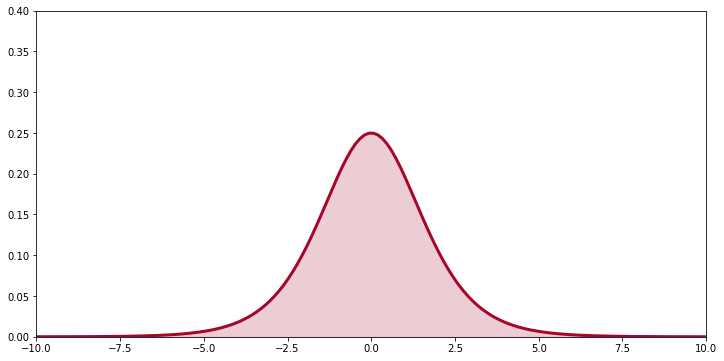

In [11]:
psi = np.linspace( -10 ,10, 150 )
y = np.exp(psi) / (1 + np.exp(psi))**2
lines = plt.plot( psi, y, color="#A60628", lw = 3 )
plt.fill_between( psi, 0, y, alpha = 0.2, color = lines[0].get_color() )
plt.autoscale(tight=True)
plt.ylim( 0, .4);

This is not a flat prior, which is to say our original $p(\theta) = 1$ do carry information after all.

Another way to think about this is the beta-binomial model in which you use a uniform, ie a Beta(1,1) prior. This adds one “success” and one “failure”, which in the limit of low data can have quite a regularizing effect.


In [12]:
from scipy.stats import beta

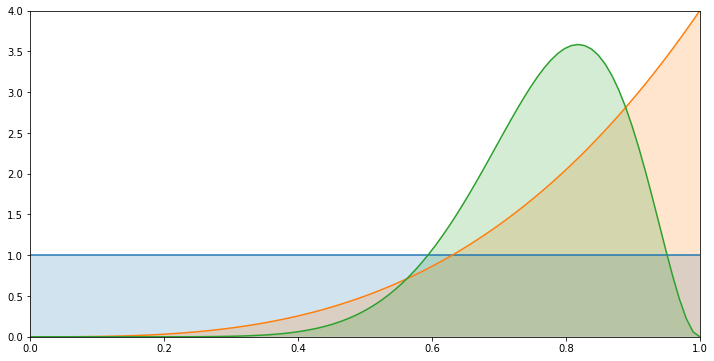

In [21]:
p = beta(1,1)
p2 = beta(4,1)
p3 = beta(10,3)
x = np.linspace(0, 1, 100)
plt.plot(x, p.pdf(x))
plt.fill_between( x, 0, p.pdf(x), alpha = 0.2)
plt.plot(x, p2.pdf(x))
plt.fill_between( x, 0, p2.pdf(x), alpha = 0.2)
plt.plot(x, p3.pdf(x))
plt.fill_between( x, 0, p3.pdf(x), alpha = 0.2)
plt.autoscale(tight=True)

# Uninformative priors

The **location prior** above can produce any sample on the real line. Thus, this ﬂat prior is not a probability density because it does not integrate to a finite number. Such a prior is called an **improper prior**. It expresses our state of ignorance on the random variable in question.
Despite the fact that this prior is both improper and dependent on parametrization, it is widely used.

If an improper prior does not lead to an improper posterior (a posterior that does not integrate to a finite number), we are fine. For example, one can start with a flat prior and a gaussian likelihood. The gaussian posterior then has a well defined integral.

## Jeffreys prior

We can use jeffreys prior to construct **priors scale variables**, such as precision/variance of a gaussian.

The point of Jeffreys priors is to create priors that don't become informative when you transform the variables. Jeffrey priors are defined as: $$p_J(\theta) \propto I(\theta)^{1/2}$$

This is used in linear regression.

Read Chapter 8. Degroot for more information.

# KL-maximization priors
Jose Bernardo (The bayesian choice) choses priors by maximising the KL-divergence between prior and posterior. This means maximizing the information brought by the data. 

# Weakly informative or regularizing prior

A related idea is the weakly informative prior, which attempts to ‘regularize’ the posterior by keeping it within reasonable bounds, but which tries not to affect the data as much as possible. Thus for example, 

- one might restrict a uniform prior to a specific range
- broaden a highly informative gaussian prior to diffuse the information. 
- One might use a $\gamma$ for a positive quantity such as a precision or variance, 
- or a half-cauchy if we wish to not limit the possibility of outliers on the positive axis.
- A gaussian prior can be used for priora on the entire real line but we often get away with using a gaussian prior which dies quickly on the positive axis. 
- If we need to deal with outliers on the whole real line we might use a fully cauchy or a students t.
We will see all of these priors as we deal with individual examples right through this course.